### Necessary Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

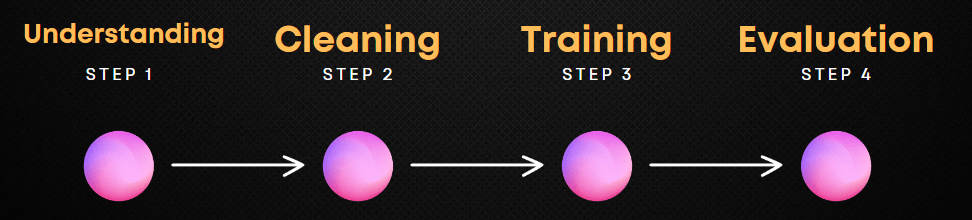

### Loading the Dataset

In [2]:
df = pd.read_csv("Iris.csv", index_col=0)

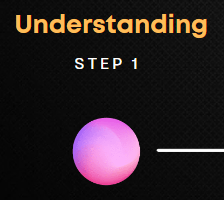

## Basic Pandas Methods

We use the `.head()` to see an overview of a dataset (called here `df`).

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


`.info()` is used to see the data types and missing values.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


`.describe()` is used to see the statistical summary of the dataset.

In [40]:
df.describe() # Displays only for numerical values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing The Data

The **numpy** library can do great things on dataframes.  
For example, we can use the **unique()** function to get the unique values of a column.  
Wait... numpy function on a pandas dataframe? Yes, because pandas is built on top of numpy.

In [41]:
unique_values, counts = np.unique(df["Species"], return_counts=True)
unique_values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

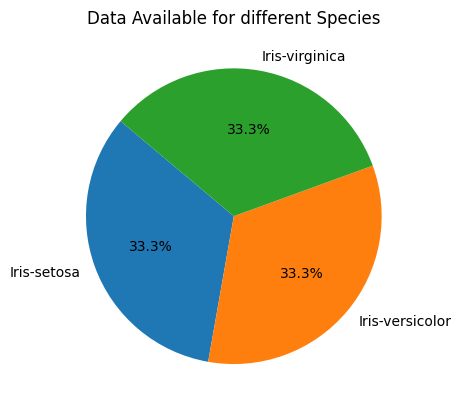

In [42]:
plt.title("Data Available for different Species")

plt.pie(counts, labels=unique_values,  startangle=140, autopct='%1.1f%%')
plt.show()

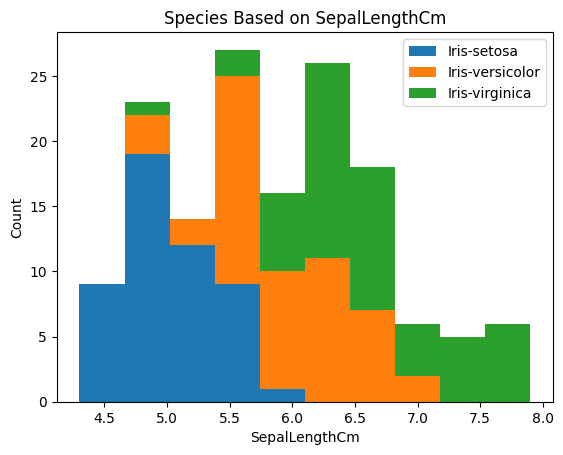

In [43]:

plt.hist([df[df['Species']=='Iris-setosa']['SepalLengthCm'], 
          df[df['Species']=='Iris-versicolor']['SepalLengthCm'], 
          df[df['Species']=='Iris-virginica']['SepalLengthCm']], 
          bins=10, stacked=True, label=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


plt.xlabel('SepalLengthCm')
plt.ylabel('Count')
plt.title('Species Based on SepalLengthCm')
plt.legend()
plt.show()

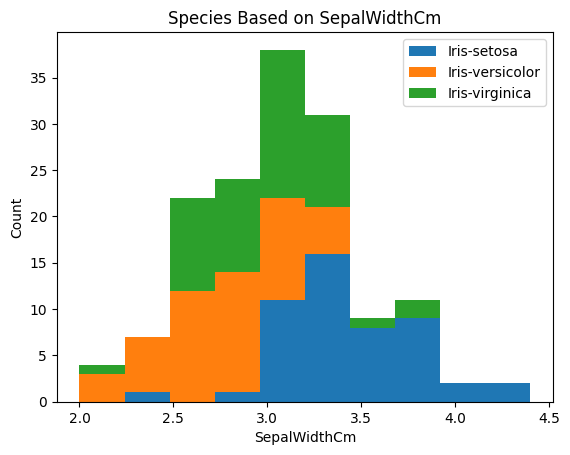

In [44]:
import matplotlib.pyplot as plt

plt.hist([df[df['Species']=='Iris-setosa']['SepalWidthCm'], 
          df[df['Species']=='Iris-versicolor']['SepalWidthCm'], 
          df[df['Species']=='Iris-virginica']['SepalWidthCm']], 
          bins=10, stacked=True, label=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


plt.xlabel('SepalWidthCm')
plt.ylabel('Count')
plt.title('Species Based on SepalWidthCm')
plt.legend()


plt.show()

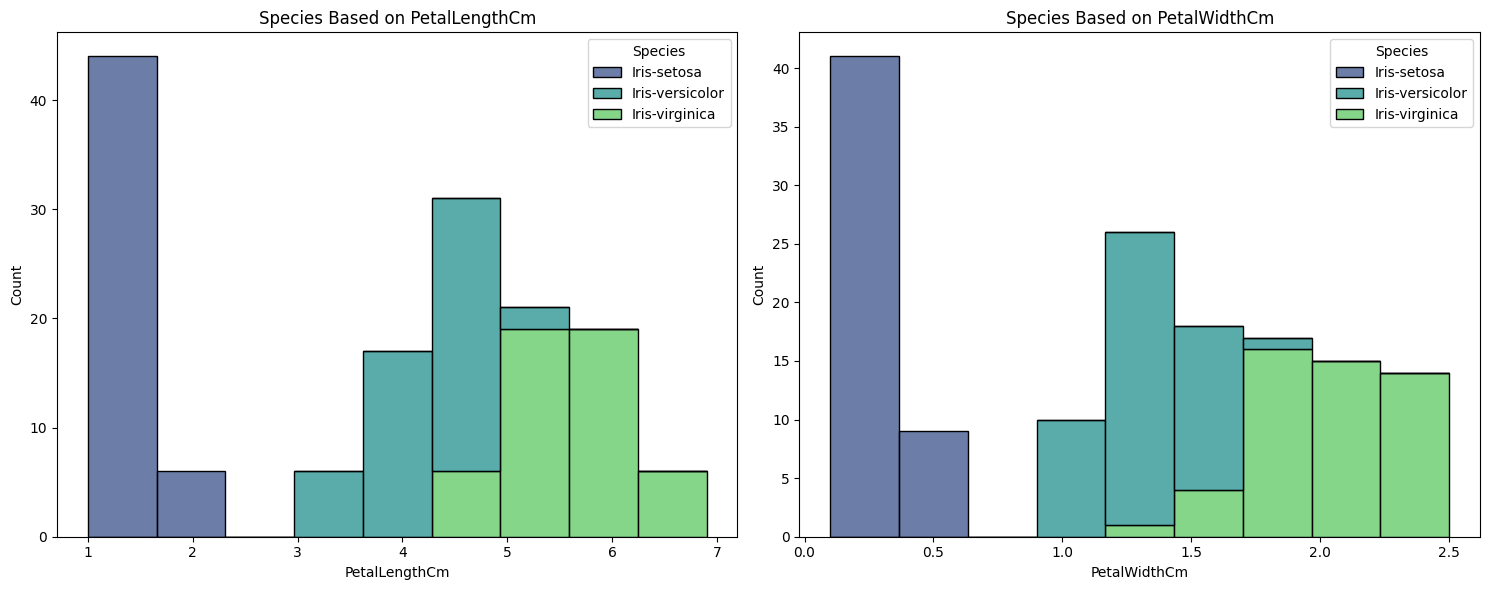

In [45]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='PetalLengthCm', hue='Species',  multiple="stack", palette="viridis")
plt.title('Species Based on PetalLengthCm')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='PetalWidthCm', hue='Species', multiple="stack", palette="viridis")
plt.title('Species Based on PetalWidthCm')

plt.tight_layout()
plt.show()

## Data Cleaning

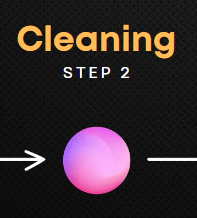

### Handling Missing Values

The first and most important step in data cleaning is to handle missing values. 
    
`.isnull().sum()` is used to see the number of missing values in each column.
    
`.dropna()` is used to drop the rows with missing values.
    
`.fillna()` is used to fill the missing values with a specific value.

In [4]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In this case, there are no missing values, so we don't need to handle them.

In [47]:
df.dtypes # or df.info()

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

All values are float, string is object, so well and good.

NOTE: Data cleaning is a vast concept and is probably the hardest part of data science. It often takes up to 80% of the time spent on a project.

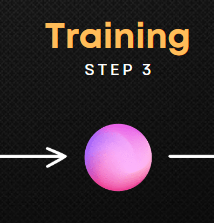

The most exciting part of the entire process!

Let's review the dataframe again.

In [58]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Required Imports

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Declaring the model

In [6]:
model = LogisticRegression()

### Creating features and targets

| Features | Targets |
| --- | --- |
| X | y |
| Independent Variables | Dependent Variables |
| Input Variables | Output Variables |
| All but last column | Last column |

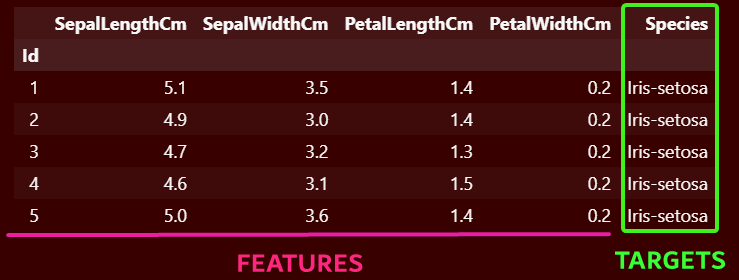

In [7]:
X = df.loc[:, 'SepalLengthCm':'PetalWidthCm'] # All but last column
y=  df['Species'] # Last column, the one we will predict

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [9]:
y[:5]

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

#### Scaling the data
We must scale the data before feeding it to the model. This is because the model might put too much focus on the features with higher values and ignore the ones with lower values.


We use SKLearn's Standard Scaler for this.  
Standard scaler will also turn the pandas dataframe into a numpy array.

In [10]:
# Initialize Standard Scaler 
scaler = StandardScaler()

# Fit and Transform the data
X = scaler.fit_transform(X)

X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [11]:
# Standard deviation of X
X.std()

1.0

### Splitting the data
We split the data into training and testing sets.  
The model might overfit on the entire training dataset.   
Testing this model on the unseen data (the testing dataset) will tell us if it actually works or not.  

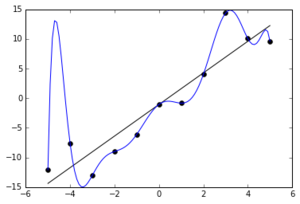

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X.shape, X_train.shape, X_test.shape

((150, 4), (120, 4), (30, 4))

In [15]:
X_train[:5]

array([[-1.50652052,  1.26346019, -1.56873522, -1.31297673],
       [-0.17367395,  3.11468391, -1.2844067 , -1.05003079],
       [ 1.03800476,  0.10644536,  0.36469871,  0.26469891],
       [-1.26418478,  0.80065426, -1.227541  , -1.31297673],
       [-1.74885626,  0.33784833, -1.39813811, -1.31297673]])

### Training the Model

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

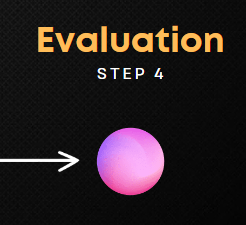

In [18]:
y_pred = model.predict(X_test)

In [27]:
model.predict([[1.5,  1.1, -1.0, 1.3]])

array(['Iris-versicolor'], dtype=object)

In [20]:
y_pred[:5] # The model predicted this

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [21]:
y_test[:5] # The actual values are

Id
74     Iris-versicolor
19         Iris-setosa
119     Iris-virginica
79     Iris-versicolor
77     Iris-versicolor
Name: Species, dtype: object

## Performance Metrics

In [23]:
# Accuracy 
str(accuracy_score(y_test,y_pred) * 100) + '%'

'100.0%'

In [97]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

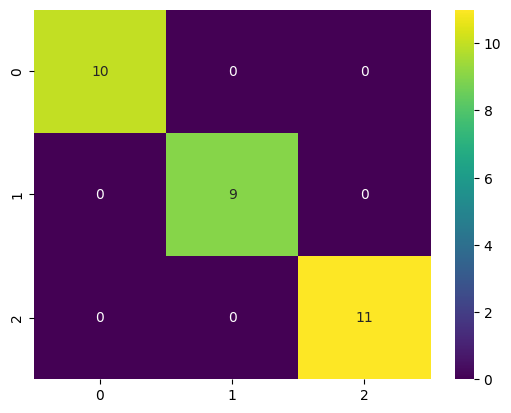

In [30]:
# Heatmap of Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d')

# The End
Congratulations on creating your first machine learning model!
This is the same process you will follow for any dataset you work on. 

Good luck with your journey on Artificial Intelligence :)

In [32]:
## Created with 💖 by Baari and Dhakshin AV

## Connect with us

**Dhakshin AV**: https://github.com/Dhaks13

**Ahmed Baari**:
- Website: https://baarify.me/
- LinkedIn: https://www.linkedin.com/in/ahmedbaari/  
- GitHub: https://github.com/AhmedBaari  
- Discord: https://discord.gg/gc5RcBZ95X  

[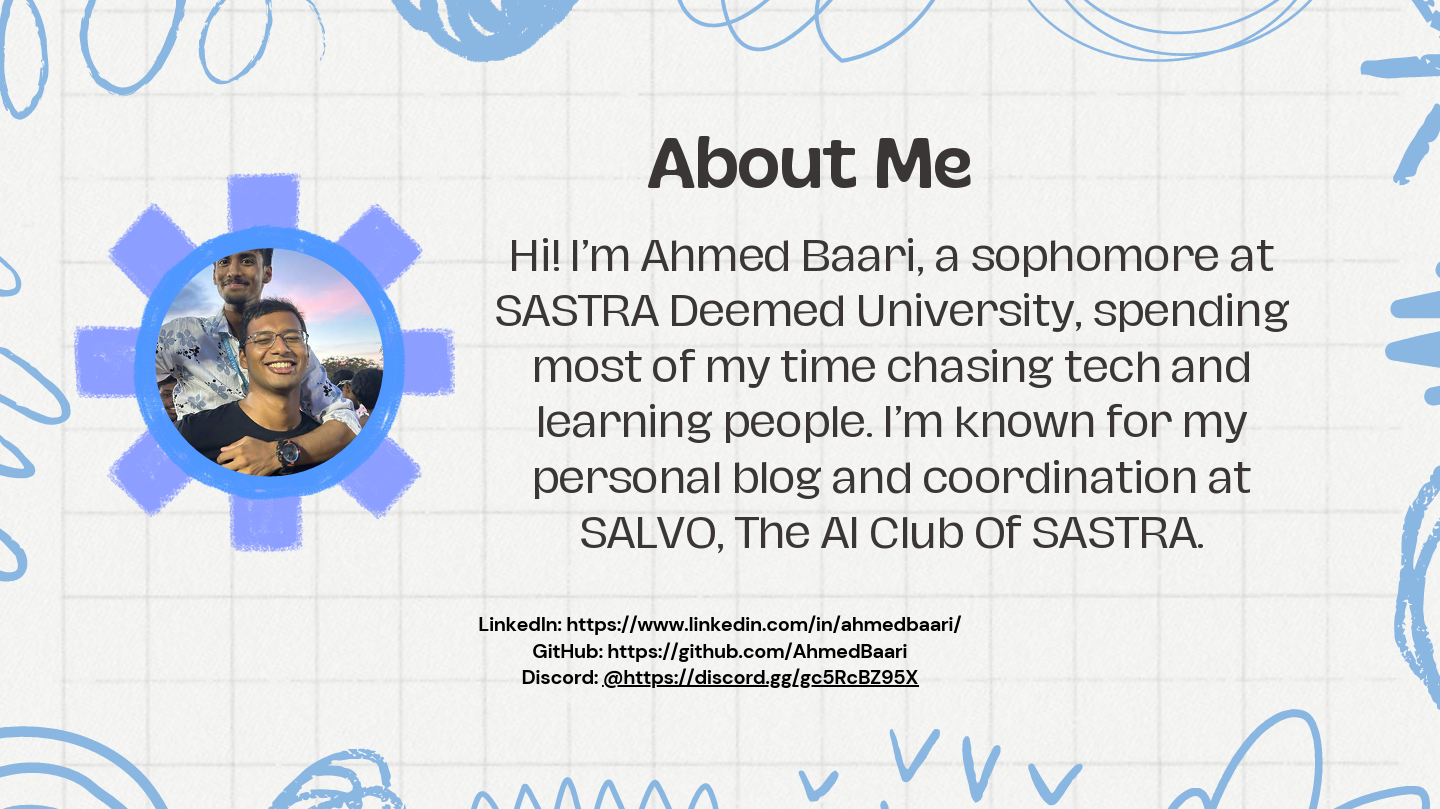](https://linkedin.com/in/ahmedbaari)
